In [424]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
os.getcwd()

'E:\\computer vision\\-Money_detector_and_estimator-master1\\-Money_detector_and_estimator-master'

In [425]:
def plot(image):
    plt.imshow(image,'gray')
    plt.show()

In [426]:
"""
this function is applied on each template , to get its featues ,, 
then we could match it with any input image that will be tested
"""
def get_currency_feature(img):
    #to ensure that image is in gray scale
    if(len(img.shape)==3):
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #declaring orb object
    orb=cv2.ORB_create()
    #find key points with ORB
    kp = orb.detect(img,None)
    # compute the descriptors with ORB
    kp, des = orb.compute(img, kp)
    
    return kp, des
    

In [428]:
def crop_image(image,x=40,y=40):
    r=[x,y,image.shape[1]-x,image.shape[0]-y]
    imCrop = image[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
    return imCrop

In [435]:
"""
thresholding each image before extract the non useful background features
"""
def thresoldd(image,typee):
    if(len(image.shape)==3):
        image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    if (typee =='test'):
        #blurred=cv2.blur(image,(25,25))
        #th = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 1)
        #th=cv2.blur(th,(25,25))
        #ret,th=cv2.threshold(th,210,255,cv2.THRESH_BINARY)
        blurred=cv2.blur(image,(25,25))
        th = cv2.adaptiveThreshold(blurred, 150, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11, 1)
        #th=blurred
        th=cv2.blur(th,(7,7))
        #plot(cv2.cvtColor(image,cv2.COLOR_BAYER_GR2BGR))
    else :
        ret,th=cv2.threshold(image,150,255,cv2.THRESH_BINARY)
    return cv2.addWeighted(image,0,th,1,0)

In [437]:
"""
x : the input image that will act as template

kp and des : the features of image to be tested .
"""

def guess(template_image, input_Kp, input_des): #kp,des of the input image , x is the images/
    #template_image=thresoldd(template_image,'template')
    template_kp,template_des=get_currency_feature(template_image)
    # create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    # Match descriptors.
    matches = bf.match(input_des, template_des)
    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)
    sum_of_matches=0 
    
    n_of_matches =7
    #print(len(matches))
    
    for i in range (0 , n_of_matches):
        sum_of_matches = sum_of_matches+ matches[i].distance  # getting list of top 7 matches' distances
    return sum_of_matches

In [431]:
class our_templates:
    templates_values = []
    num_of_templates = 0 
    templates_list  =[]
    #add any new templates here
    def __init__(self):
        
        half_pound_front=cv2.imread('dataset//templates//half_pound_coin_front.png')
        self.templates_list.append(half_pound_front)
        self.templates_values.append(0.5)
        
        half_pound_back=cv2.imread('dataset//templates//half_pound_coin_back.png')
        self.templates_list.append(half_pound_back)
        self.templates_values.append(0.5)
        
        one_pound_back=cv2.imread('dataset//templates//one_pound_coin_back.png')
        self.templates_list.append(one_pound_back)
        self.templates_values.append(1)
        
        one_pound_front=cv2.imread('dataset//templates//one_pound_coin_front.png')
        self.templates_list.append(one_pound_front)
        self.templates_values.append(1)

        one_pound_back_paper=cv2.imread('dataset//templates//one_pound_paper_back.png')
        self.templates_list.append(one_pound_back_paper)
        self.templates_values.append(1)
        
        one_pound_front_paper=cv2.imread('dataset//templates//one_pound_paper_front.png')
        self.templates_list.append(one_pound_front_paper)
        self.templates_values.append(1)
                
        ten_pound_front_paper=cv2.imread('dataset//templates//10_front.png')
        self.templates_list.append(ten_pound_front_paper)
        self.templates_values.append(10)
        
                
        ten_pound_back_paper=cv2.imread('dataset//templates//10_back.png')
        self.templates_list.append(ten_pound_back_paper)
        self.templates_values.append(10)
        
        two_hundred_pound_back_paper=cv2.imread('dataset//templates//200b.png')
        self.templates_list.append(two_hundred_pound_back_paper)
        self.templates_values.append(200)
        
        two_hundred_pound_front_paper=cv2.imread('dataset//templates//200f.jpg')
        self.templates_list.append(two_hundred_pound_front_paper)
        self.templates_values.append(200)
        
        one_hundred_pound_front_paper=cv2.imread('dataset//templates//100f.jpg')
        self.templates_list.append(one_hundred_pound_front_paper)
        self.templates_values.append(100)
        
        one_hundred_pound_back_paper=cv2.imread('dataset//templates//100b.jpg')
        self.templates_list.append(one_hundred_pound_back_paper)
        self.templates_values.append(100)
        
        five_pound_front_paper=cv2.imread('dataset//templates//5 part_1.jpg')
        self.templates_list.append(five_pound_front_paper)
        self.templates_values.append(5)
        
        five_pound_back_paper=cv2.imread('dataset//templates//five_pound_paper_back.jpg')
        self.templates_list.append(five_pound_back_paper)
        self.templates_values.append(5)
        
        self.num_of_templates = len(self.templates_values)
        
        
        

In [432]:

def estimate( input_kp, input_des , templates,label):
    overall_matches=[] 
    for i in range(0 ,templates.num_of_templates ):
        #print(templates.templates_list[i])
        overall_matches.append( guess(templates.templates_list[i] ,input_kp , input_des )  )
    
    minimum_dis = overall_matches.index(min(overall_matches)) #getting index of the predicted banknote
    #print('minm distance:',overall_matches[minimum_dis])
    predicted = templates.templates_values[minimum_dis]
    #print(type(label))
    #print("preddicted = {0} ,index = {1},expected:{2:s}".format(predicted , minimum_dis , label))
    return predicted,overall_matches[minimum_dis]


In [464]:
##test_pictures
project_path=os.getcwd()   ###"""returns the current working directory"""
#project_path=os.path.join('E:\computer vision\-Money_detector_and_estimator-master')
#print(project_path)
data_path=os.path.join(project_path,'Test Images')   ###"""joins the working directory to the test folder"""
training_data=[]
training_label=[]
print(os.listdir(data_path))
###access folders and collect data for each class###
for i in os.listdir(data_path):
    training_data.append(cv2.imread(os.path.join(data_path,i),1))
    training_label.append(i[:-3])
print(len(training_data),len(training_label))

['five pounds.jpg', 'one hundred pounds.jpg', 'ten pounds.jpg', 'two hundred pounds.jpg']
4 4


In [433]:
"""
prprocessing the inputt image and then extract feature from it
plus cropping the image to make sure no backgroung features are taking into consideration
"""
def preprocessing_exctracting(image,x,y):
    new_image=crop_image(image,x,y)
    new_image=thresoldd(new_image,'test')
    kp,des=get_currency_feature(new_image)
    return new_image,kp,des
        

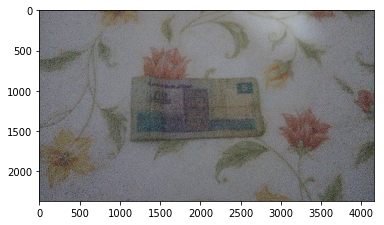

Predicted: 5     Expected: five pounds.


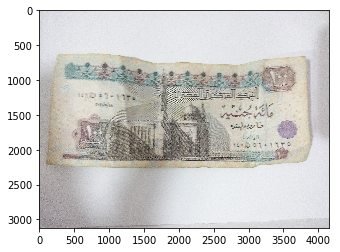

Predicted: 100     Expected: one hundred pounds.


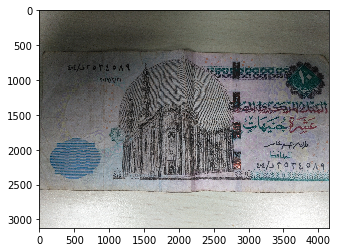

Predicted: 10     Expected: ten pounds.


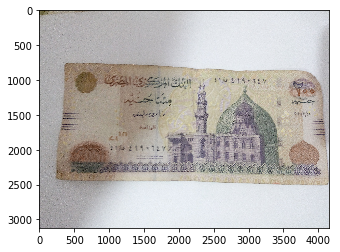

Predicted: 200     Expected: two hundred pounds.


In [465]:
templatess = our_templates()
results = []
counter=0
flag=False
for i in range(0,len(training_data)):
    #plt.imshow(samples_list[i])
    #plt.show()
    #print(type(training_label[i]))
    min_dist_old=0
    min_dist_new=0
    test_img=training_data[i]
    label=training_label[i]
    counter=0
    if(flag==True):
        plot(training_data[i-1][:,:,::-1])
        print('Predicted:',pred,'    Expected:',training_label[i-1])
    #print(i)
    while(min_dist_new<=min_dist_old or min_dist_old==0):
        flag=True
        """min_dist_new<=min_dist_old or min_dist_old==0"""
        #print('min_dist_old:',min_dist_old,'min_dist_new:',min_dist_new)
        min_dist_old=min_dist_new
        test_img,kp,des=preprocessing_exctracting(test_img,40,40)
        pred,min_dist_new=estimate(kp , des , templatess,label)
        #if(min_dist_new<=min_dist_old):
        #counter=counter+1
plot(training_data[i][:,:,::-1])
print('Predicted:',pred,'    Expected:',training_label[i])
        



#money_detected=first_image+second_image

#print(money_detected)